# Heart Disease Prediction
#### Life cycle of Machine learning Project 

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

#### Problem statement
   
This project analyzes how patient health indicators such as age, cholesterol level, chest pain type, ECG results, and exercise-induced angina influence the likelihood of heart disease.

#### Data Collection

* Dataset Source - https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv
* The data consists of 12 column and 918 rows.

# Import Required Packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [3]:
df = pd.read_csv("heart.csv")

# Exploratory data analysis

In [4]:
# Show Top 5 Records 
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Shape of the dataset 
df.shape

(918, 12)

In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Check Missing values 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Check Duplicates 
df.duplicated().sum()

np.int64(0)

### Data set has no missing values and no duplicates

In [9]:
# Checking the number of unique values of each column 
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

## Types of data
* contineous data - Age, RestingBP, Cholesterol, MaxHR, Oldpeak
* categorical data - Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease

In [10]:
# Check statistics of data set 
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Insight from stats

* Both RestingBP and Cholesterol have a minimum value of 0, which is medically impossible. This indicates missing or incorrect entries that must be corrected or removed during preprocessing.
* The mean of HeartDisease is 0.553, meaning around 55% of the patients in the dataset are positive for heart disease. This suggests the dataset is slightly imbalanced toward heart disease cases. 

In [11]:
# checking all columns 
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [12]:
# check value count for a columns 
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

# Exploring Data ( Visualization )

# Hist plot 
Used to visualize the distribution of numerical data and see how values are spread. 

You can see:
* skewness
* peaks
* spread
* gaps
* overall shape of data

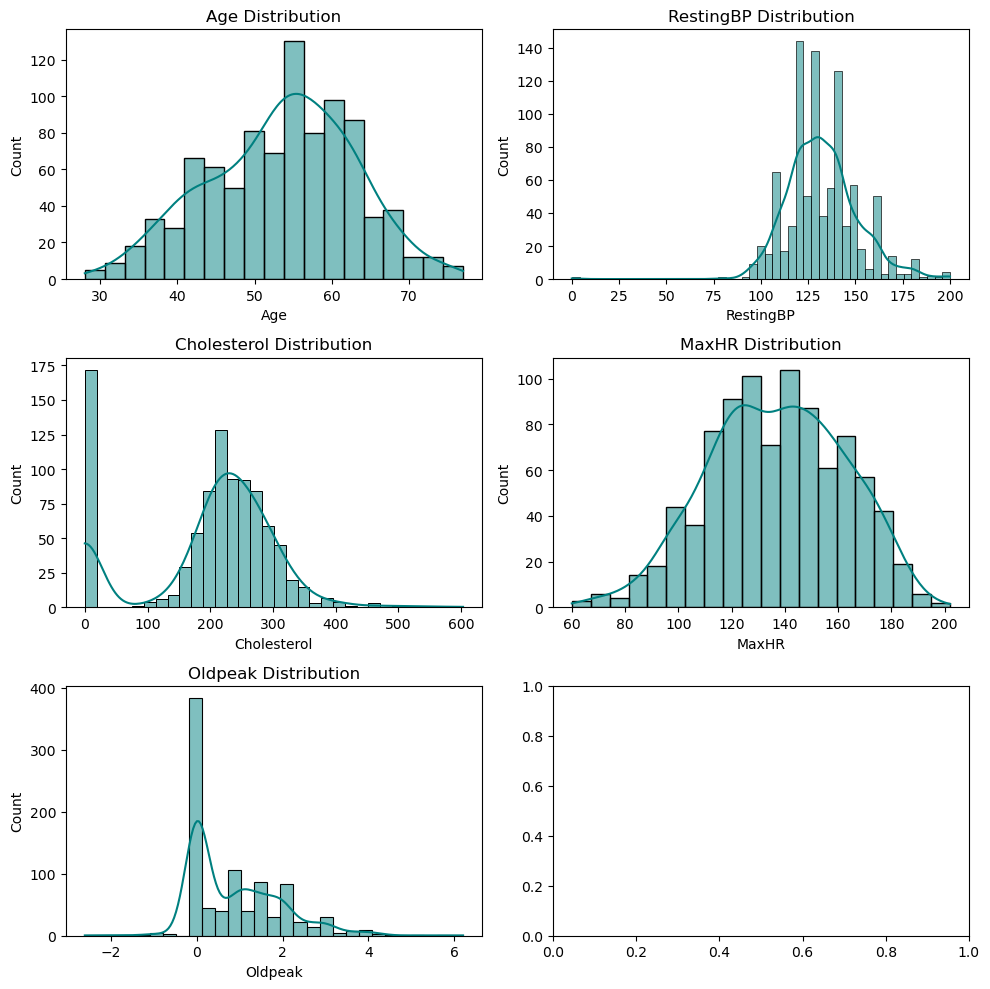

In [13]:
# Histogram & KDE for continious data 
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Age
sns.histplot(data=df, x='Age', kde=True, color='teal', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

# RestingBP
sns.histplot(data=df, x='RestingBP', kde=True, color='teal', ax=axes[0, 1])
axes[0, 1].set_title("RestingBP Distribution")

# Cholesterol
sns.histplot(data=df, x='Cholesterol', kde=True, color='teal', ax=axes[1, 0])
axes[1, 0].set_title("Cholesterol Distribution")

# MaxHR
sns.histplot(data=df, x='MaxHR', kde=True, color='teal', ax=axes[1, 1])
axes[1, 1].set_title("MaxHR Distribution")

# Oldpeak
sns.histplot(data=df, x='Oldpeak', kde=True, color='teal', ax=axes[2, 0])
axes[2, 0].set_title("Oldpeak Distribution")

plt.tight_layout()
plt.show()

# Insights from hist plot
* Most patients fall between 45–65 years(more older patients).
* RestingBP and Cholesterol contain several 0 values, which are invalid data.
* Most patients have 0 oldpeak value

# Count plot 
Used to show frequency counts of each category in categorical features. 
* Countplots show how many observations fall into each category.
* Using hue='HeartDisease' helps verify if the target variable is balanced across categories.

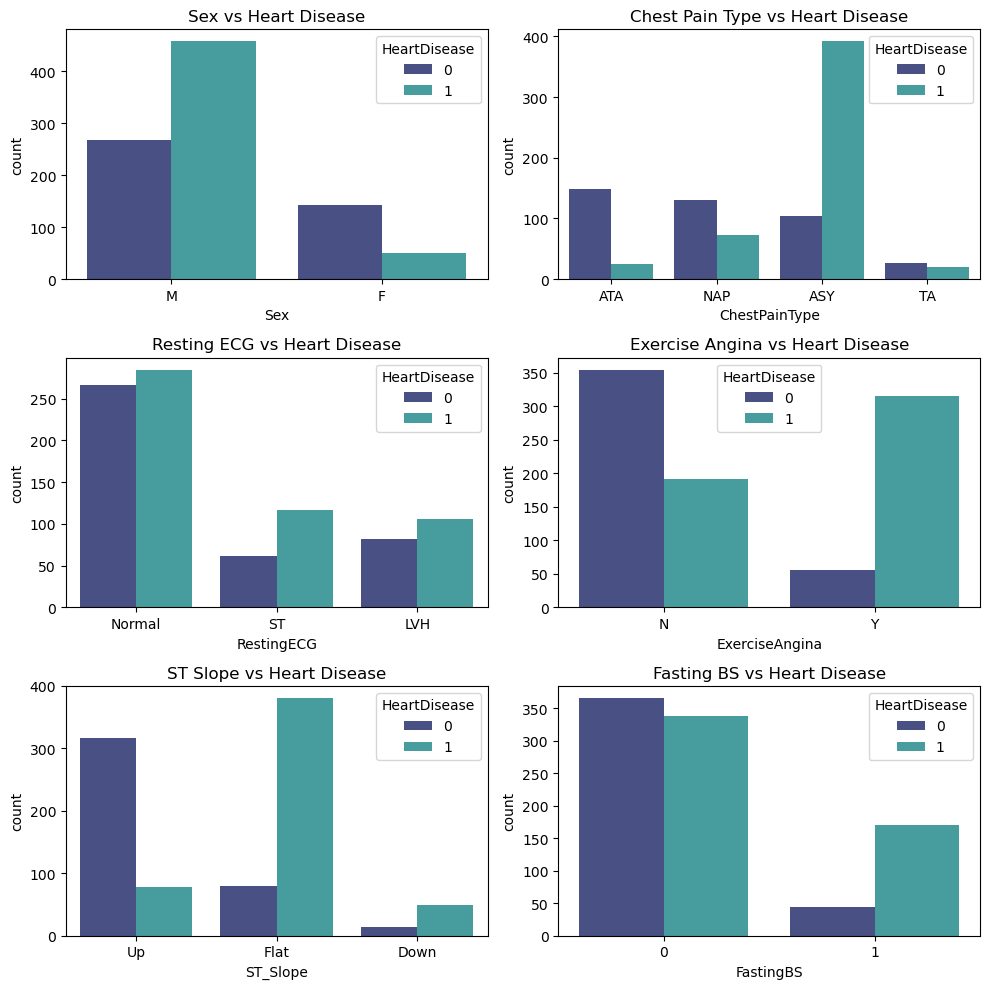

In [14]:
# count plot for categorical data 
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot 1: Sex
sns.countplot(x=df['Sex'], hue=df['HeartDisease'], ax=axes[0, 0], palette='mako')
axes[0, 0].set_title("Sex vs Heart Disease")

# Plot 2: Chest Pain Type
sns.countplot(x=df['ChestPainType'], hue=df['HeartDisease'], ax=axes[0, 1], palette='mako')
axes[0, 1].set_title("Chest Pain Type vs Heart Disease")

# Plot 3: Resting ECG
sns.countplot(x=df['RestingECG'], hue=df['HeartDisease'], ax=axes[1, 0], palette='mako')
axes[1, 0].set_title("Resting ECG vs Heart Disease")

# Plot 4: Exercise Angina
sns.countplot(x=df['ExerciseAngina'], hue=df['HeartDisease'], ax=axes[1, 1], palette='mako')
axes[1, 1].set_title("Exercise Angina vs Heart Disease")

# Plot 5: ST Slope
sns.countplot(x=df['ST_Slope'], hue=df['HeartDisease'], ax=axes[2, 0], palette='mako')
axes[2, 0].set_title("ST Slope vs Heart Disease")

# Plot 6: Fasting BS
sns.countplot(x=df['FastingBS'], hue=df['HeartDisease'], ax=axes[2, 1], palette='mako')
axes[2, 1].set_title("Fasting BS vs Heart Disease")

plt.tight_layout()
plt.show()

# Insights from count plot 
* Males (M) have a much higher proportion of heart disease.
* “ASY” pain types have a higher number of heart disease cases.
* Yes ExerciseAngina higher heart disease count, No ExerciseAngina mostly no heart disease
* FastingBS 1 have a much higher proportion of heart disease.

# Box plots 
used to understand the distribution of numerical data and to compare it across categories (like HeartDisease = 0 vs 1).
* show distribution using 5 summary statistics
* detecting outliers
* To compare two groups

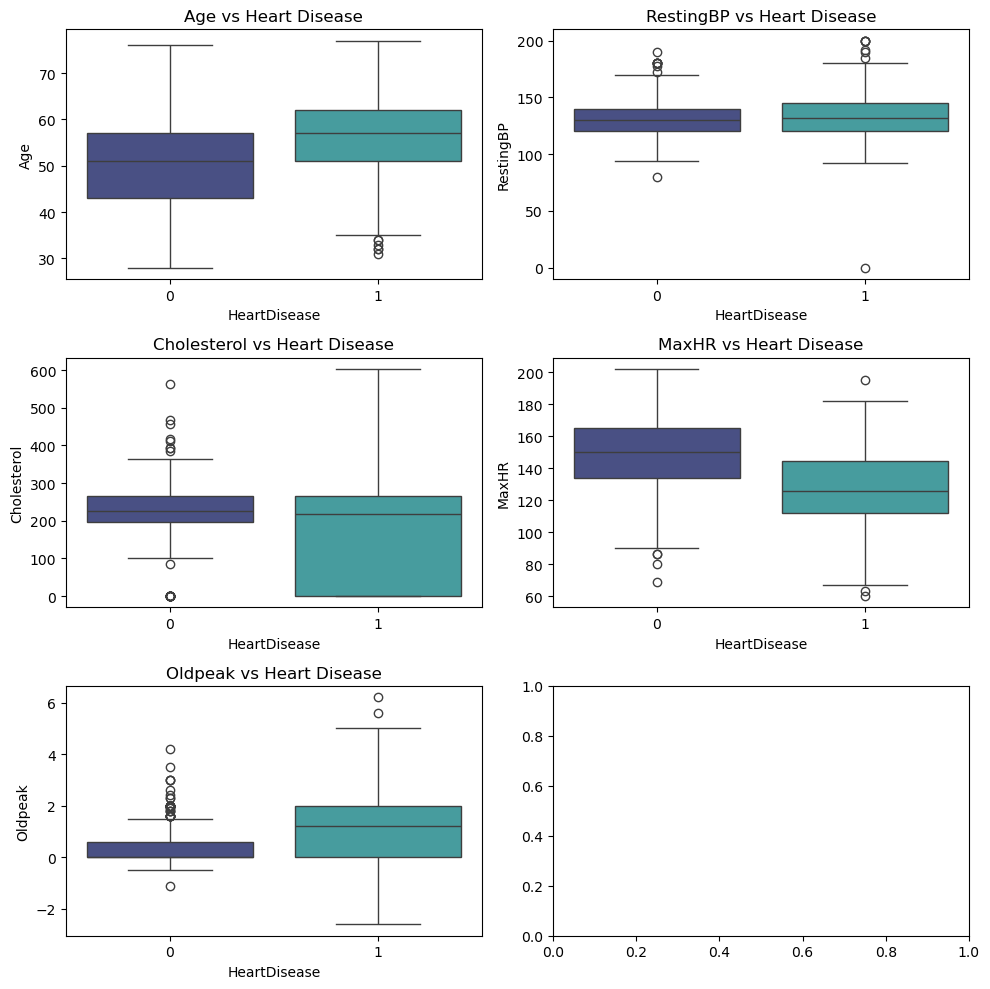

In [15]:
# box plot to check continous data vs target(categorical data)
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# 1. Age
sns.boxplot(x='HeartDisease', y='Age', data=df, ax=axes[0, 0], palette='mako')
axes[0, 0].set_title("Age vs Heart Disease")

# 2. RestingBP
sns.boxplot(x='HeartDisease', y='RestingBP', data=df, ax=axes[0, 1], palette='mako')
axes[0, 1].set_title("RestingBP vs Heart Disease")

# 3. Cholesterol
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, ax=axes[1, 0], palette='mako')
axes[1, 0].set_title("Cholesterol vs Heart Disease")

# 4. MaxHR
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, ax=axes[1, 1], palette='mako')
axes[1, 1].set_title("MaxHR vs Heart Disease")

# 5. Oldpeak
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, ax=axes[2, 0], palette='mako')
axes[2, 0].set_title("Oldpeak vs Heart Disease")

plt.tight_layout()
plt.show()

# Insights from box plot
* Patients with heart disease tend to be older on average.
* Patients with heart disease generally show higher cholesterol variability.
* Heart-disease patients typically achieve a lower maximum heart rate.
* lower oldpeak value patients have no Heart-disease
* outliers in cholesterol and RestingBP

# Violin plots
used to understand the distribution of numerical data and to compare it across categories (like HeartDisease = 0 vs 1).

* show the full distribution shape (Peaks, Skewness, Multi-modality)
* Better understanding of how data is spread (concentrated, spread out, bimodal (two peaks))
* To compare two groups

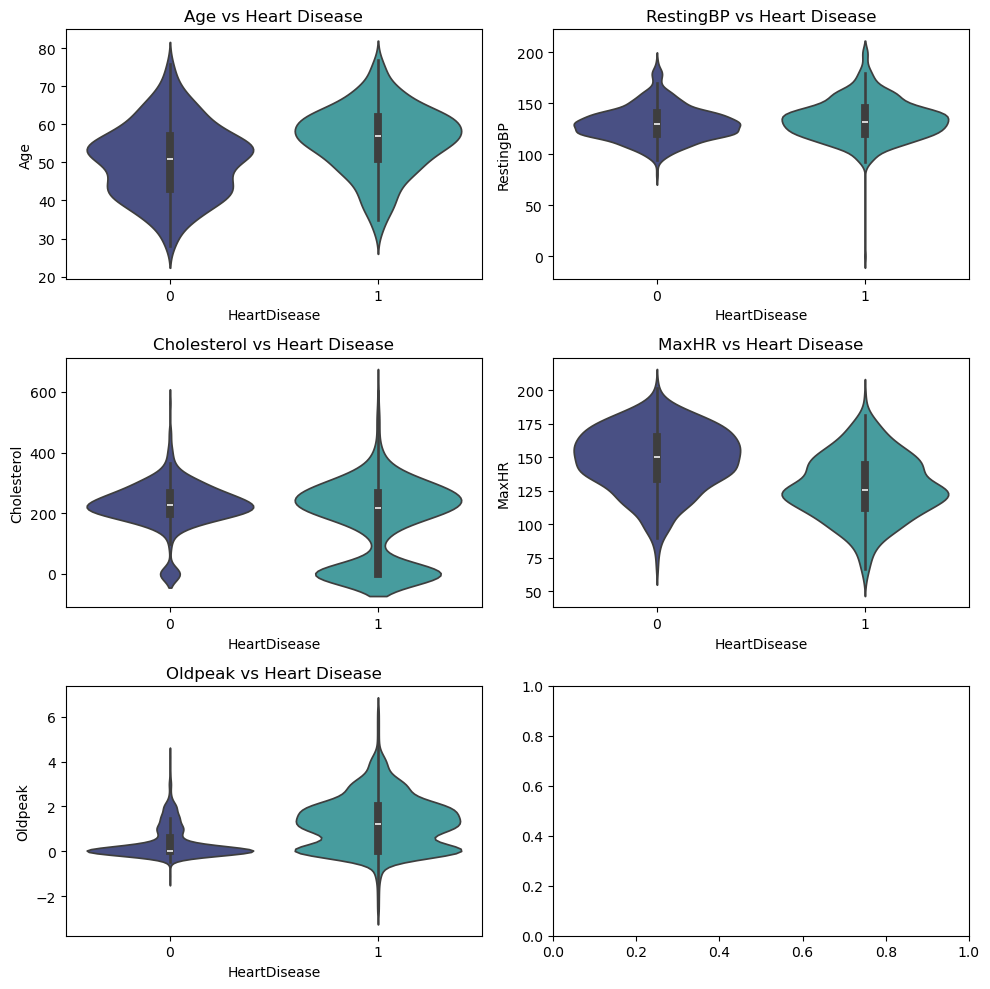

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# 1. Age
sns.violinplot(x='HeartDisease', y='Age', data=df, ax=axes[0, 0], palette='mako')
axes[0, 0].set_title("Age vs Heart Disease")

# 2. RestingBP
sns.violinplot(x='HeartDisease', y='RestingBP', data=df, ax=axes[0, 1], palette='mako')
axes[0, 1].set_title("RestingBP vs Heart Disease")

# 3. Cholesterol
sns.violinplot(x='HeartDisease', y='Cholesterol', data=df, ax=axes[1, 0], palette='mako')
axes[1, 0].set_title("Cholesterol vs Heart Disease")

# 4. MaxHR
sns.violinplot(x='HeartDisease', y='MaxHR', data=df, ax=axes[1, 1], palette='mako')
axes[1, 1].set_title("MaxHR vs Heart Disease")

# 5. Oldpeak
sns.violinplot(x='HeartDisease', y='Oldpeak', data=df, ax=axes[2, 0], palette='mako')
axes[2, 0].set_title("Oldpeak vs Heart Disease")

plt.tight_layout()
plt.show()

# Insights from violin plot
* Heart disease group has a heavier density in older ages.
* Heart-disease patients typically achieve a lower maximum heart rate.
* High variability, long tails.
* No Heart disease group has a heavier density in lower oldpeak value.

# Heat map
A heatmap is used to visualize correlations between numerical features, helping identify important relationships, multicollinearity, and patterns that guide feature selection for modeling.

<Axes: >

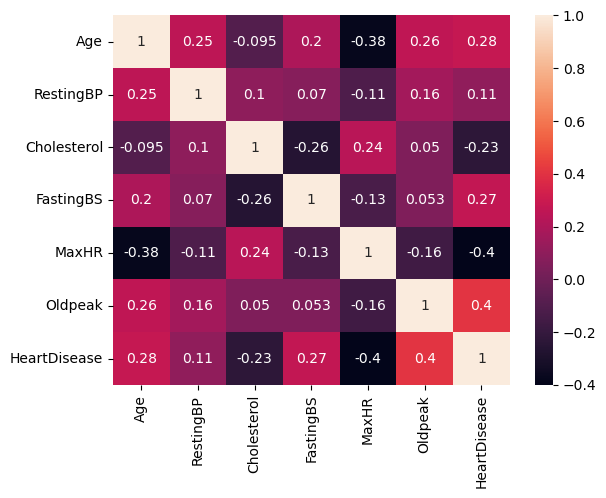

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Insights from heatmap
* MaxHR and Cholesterol are negatively correlated with HeartDisease
* RestingBP have very low correlation with HeartDisease
* Other shows a mild positive correlation.
* None of the numerical features are extremely correlated with each other (like > 0.8)

# Pairplot
Shows all pairwise relationships between all numerical features in the dataset using scatterplots and histograms..

Useful for:

* Multicollinearity
* Separation between classes
* Hidden relationships

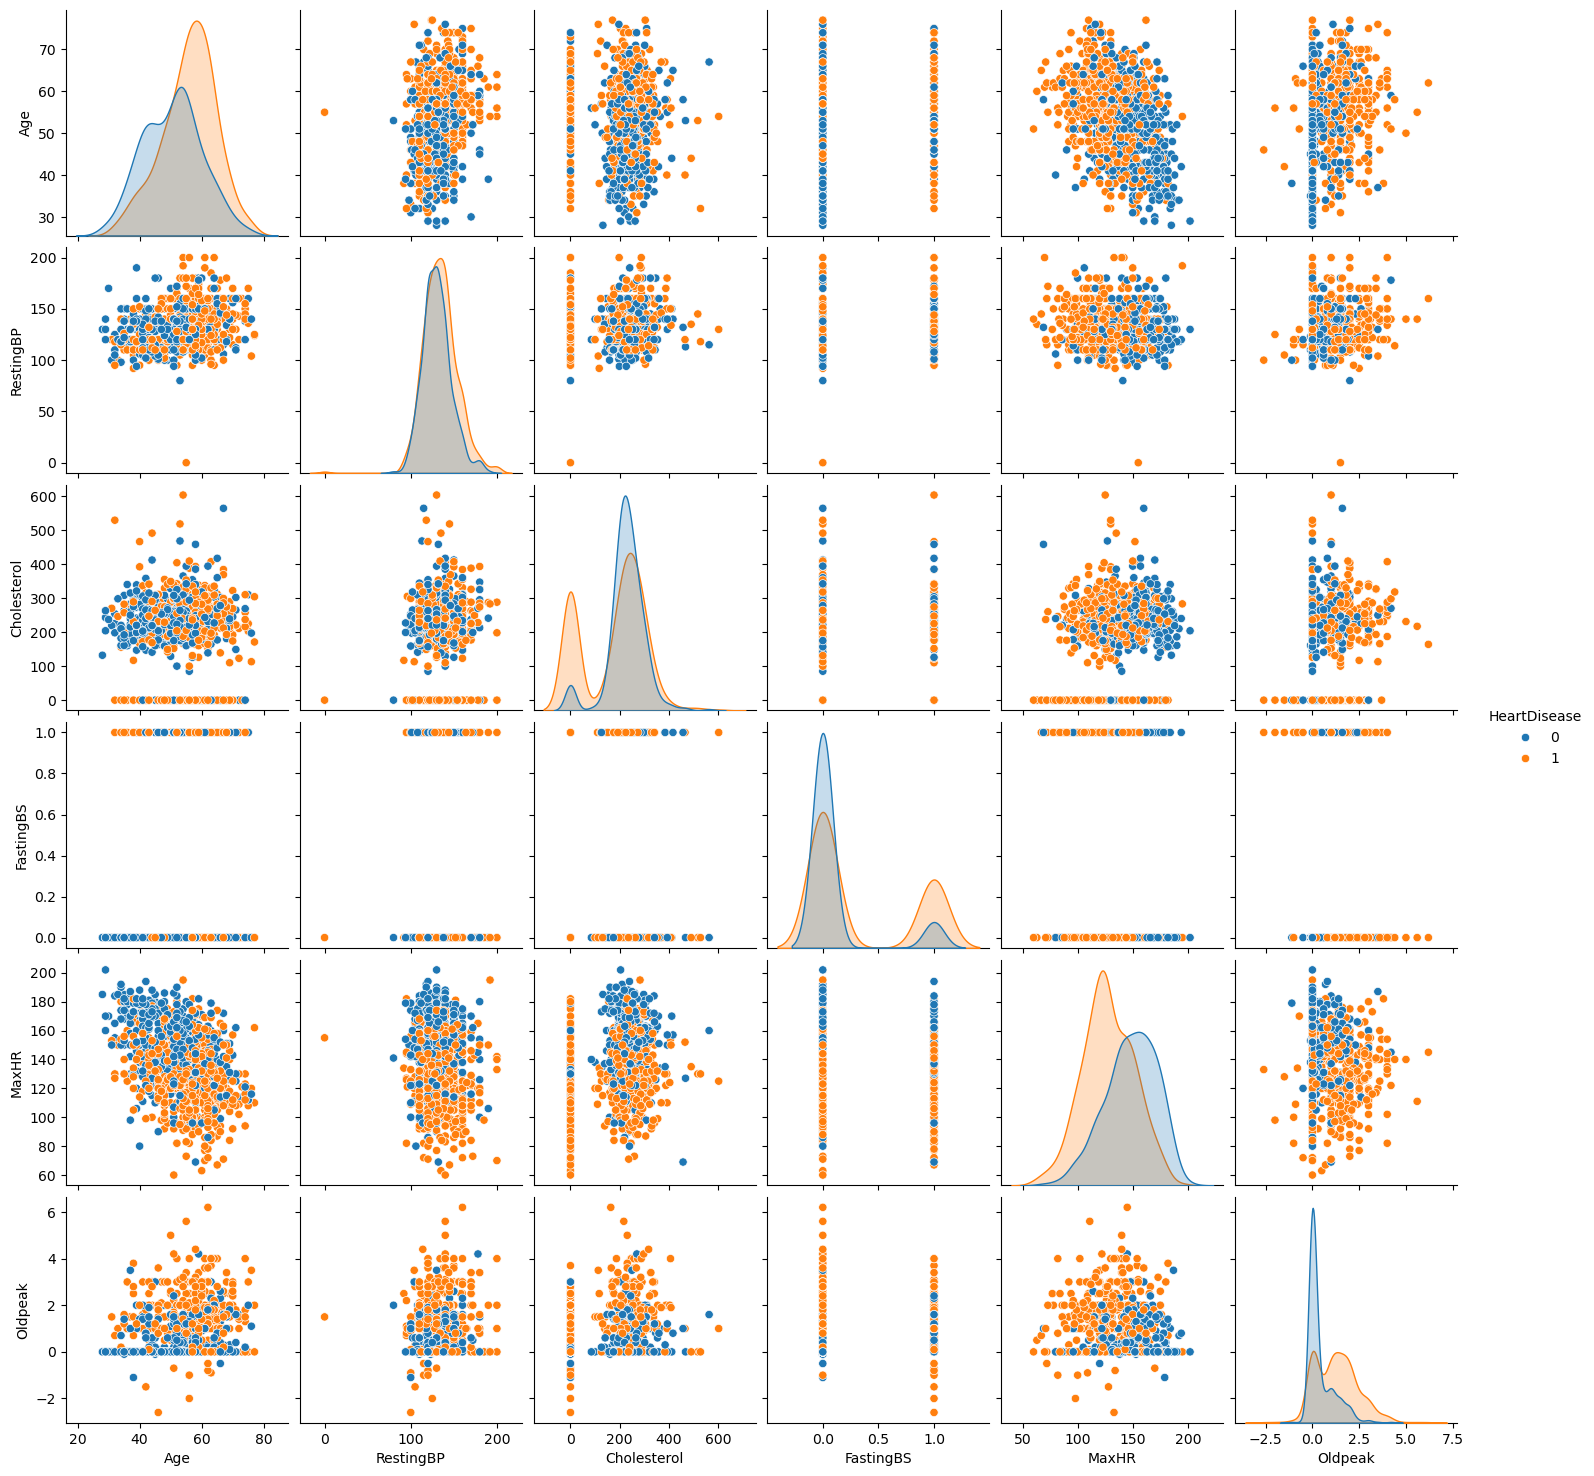

In [18]:
sns.pairplot(df, hue='HeartDisease')

# Target-specific statistical summary 

shows how each numerical feature differs between patients with and without heart disease. It helps identify important predictors, supports pattern interpretation, and guides feature selection.

In [19]:
df.groupby('HeartDisease').mean(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


# Insights on Target-specific statistical summary
* Mean age is higher for patients with heart disease.
* RestingBP and Cholesterol are not a strong differentiator.
* MaxHR is significantly lower for heart-disease patients.
* Heart-disease patients show higher Oldpeak values on average.

# Checking class balance 

tells us how evenly the target classes are distributed. 

It helps detect dataset imbalance, choose proper evaluation metrics, and decide whether techniques like oversampling or class weighting are needed to train a fair and reliable model.

In [20]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

# Insights of class balance
The dataset contains slightly more heart-disease cases (~55%), indicating a mild imbalance that should be kept in mind during model evaluation.

# Correlation with the target

In [21]:
df.corr(numeric_only=True)['HeartDisease'].sort_values()

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

# Data Cleaning

In [22]:
df_cleaned = df.copy()

In [23]:
df_cleaned.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Need to fix logic error in Cholesterol and RestingBP.

In [24]:
cholesterol_mean = df_cleaned.loc[df_cleaned['Cholesterol'] != 0, 'Cholesterol'].mean()

# Step 2: Replace 0s with the calculated mean
df_cleaned['Cholesterol'] = df_cleaned['Cholesterol'].replace(0, cholesterol_mean)

# Optional: Round to 2 decimal places (if needed)
df_cleaned['Cholesterol'] = df_cleaned['Cholesterol'].round(2)

In [25]:
resting_bp_mean = df_cleaned.loc[df_cleaned['RestingBP'] != 0, 'RestingBP'].mean()

df_cleaned['RestingBP'] = df_cleaned['RestingBP'].replace(0, resting_bp_mean)

df_cleaned['RestingBP'] = df_cleaned['RestingBP'].round(2)

Text(0.5, 1.0, 'Cholesterol Distribution after')

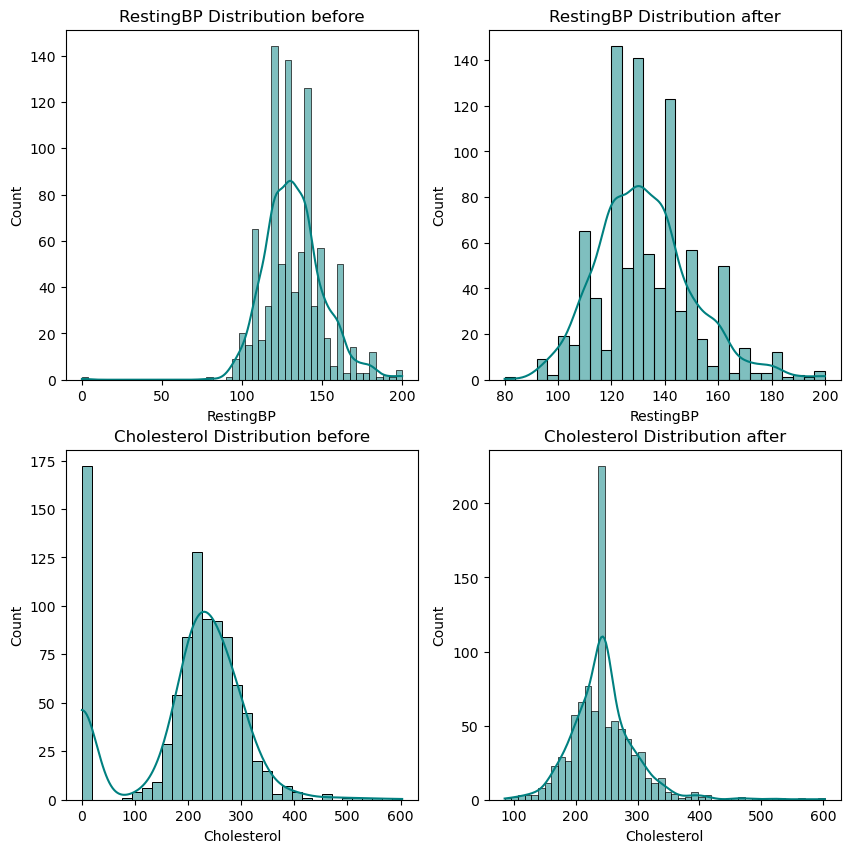

In [26]:
# Histogram & KDE for RestingBP and  Cholesterol 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# RestingBP
sns.histplot(data=df, x='RestingBP', kde=True, color='teal', ax=axes[0, 0])
axes[0, 0].set_title("RestingBP Distribution before")

# RestingBP
sns.histplot(data=df_cleaned, x='RestingBP', kde=True, color='teal', ax=axes[0, 1])
axes[0, 1].set_title("RestingBP Distribution after")

# Cholesterol
sns.histplot(data=df, x='Cholesterol', kde=True, color='teal', ax=axes[1, 0])
axes[1, 0].set_title("Cholesterol Distribution before")

# Cholesterol
sns.histplot(data=df_cleaned, x='Cholesterol', kde=True, color='teal', ax=axes[1, 1])
axes[1, 1].set_title("Cholesterol Distribution after")

# Data preprocessing 

In [27]:
df_encoded = df_cleaned.copy()

In [28]:
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


# Feature Engineering 
Create Age Groups (Binning Age)

In [29]:
df_encoded['AgeGroup'] = pd.cut(df_cleaned['Age'],
                        bins=[20, 40, 55, 80],
                        labels=['Young', 'Middle-aged', 'Senior'])

In [30]:
df_encoded.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'AgeGroup'],
      dtype='object')

# One-Hot Encoding

In [31]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [32]:
df_encoded =  df_encoded.astype(int)

In [33]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,AgeGroup_Middle-aged,AgeGroup_Senior
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1,0,0
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1,0,0
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0,0,1
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0,0,1
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0,0,1


# Feature selection

In [34]:
df_encoded.corr(numeric_only=True)['HeartDisease'].sort_values(ascending=False)

HeartDisease            1.000000
ST_Slope_Flat           0.554134
ExerciseAngina_Y        0.494282
Oldpeak                 0.392385
Sex_M                   0.305445
Age                     0.282039
AgeGroup_Senior         0.274986
FastingBS               0.267291
RestingBP               0.117909
RestingECG_ST           0.102527
Cholesterol             0.092586
ChestPainType_TA       -0.054790
RestingECG_Normal      -0.091580
AgeGroup_Middle-aged   -0.188566
ChestPainType_NAP      -0.212964
MaxHR                  -0.400421
ChestPainType_ATA      -0.401924
ST_Slope_Up            -0.622164
Name: HeartDisease, dtype: float64

#### All features shows satisfactory correlation with the target

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Train test split

In [36]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature Scaling

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Testing

In [39]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [40]:
results = []

In [41]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4),
        'ROC-AUC': round(roc, 4)
    })

In [42]:
results

[{'Model': 'Logistic Regression',
  'Accuracy': 0.8913,
  'Precision': 0.902,
  'Recall': 0.902,
  'F1 Score': 0.902,
  'ROC-AUC': np.float64(0.89)},
 {'Model': 'KNN',
  'Accuracy': 0.8859,
  'Precision': 0.901,
  'Recall': 0.8922,
  'F1 Score': 0.8966,
  'ROC-AUC': np.float64(0.8851)},
 {'Model': 'Naive Bayes',
  'Accuracy': 0.8859,
  'Precision': 0.9263,
  'Recall': 0.8627,
  'F1 Score': 0.8934,
  'ROC-AUC': np.float64(0.8887)},
 {'Model': 'Decision Tree',
  'Accuracy': 0.7663,
  'Precision': 0.8105,
  'Recall': 0.7549,
  'F1 Score': 0.7817,
  'ROC-AUC': np.float64(0.7677)},
 {'Model': 'SVM (RBF Kernel)',
  'Accuracy': 0.8804,
  'Precision': 0.8704,
  'Recall': 0.9216,
  'F1 Score': 0.8952,
  'ROC-AUC': np.float64(0.8754)}]

In [43]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
ensemble_models = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1),
    "XGB Classifier": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

In [45]:
ensamble_models_results = []

In [46]:
for name, ensemble_models in ensemble_models.items():
    ensemble_models.fit(X_train, y_train)
    y_pred = ensemble_models.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    ensamble_models_results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4),
        'ROC-AUC': round(roc, 4)
    })

In [47]:
ensamble_models_results

[{'Model': 'Random Forest Classifier',
  'Accuracy': 0.8098,
  'Precision': 0.819,
  'Recall': 0.8431,
  'F1 Score': 0.8309,
  'ROC-AUC': np.float64(0.8057)},
 {'Model': 'Gradient Boosting Classifier',
  'Accuracy': 0.8641,
  'Precision': 0.8738,
  'Recall': 0.8824,
  'F1 Score': 0.878,
  'ROC-AUC': np.float64(0.8619)},
 {'Model': 'XGB Classifier',
  'Accuracy': 0.875,
  'Precision': 0.8835,
  'Recall': 0.8922,
  'F1 Score': 0.8878,
  'ROC-AUC': np.float64(0.8729)}]

# Saving best model

In [48]:
import joblib
joblib.dump(models['Logistic Regression'],'LR_heart_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')
joblib.dump(X.columns.tolist(),'heart_columns.pkl')

['heart_columns.pkl']

In [49]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'AgeGroup_Middle-aged', 'AgeGroup_Senior'],
      dtype='object')